In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

In [2]:
n_years = 30000

df = pd.read_excel("./data/d18O NGRIP 21.04.24.xlsx", 
                   sheet_name="Raw Data", header=None, 
                   engine="openpyxl")

df_data = df.iloc[10:6124,2:4]
df_data.columns = ["Age", "d18o"]

df_data["Age"] = df_data["Age"] - min(df_data["Age"])
df_data["d18o"] = df_data["d18o"] - np.mean(df_data["d18o"]) 
df_data = df_data[df_data["Age"] <= n_years]

t = df_data["Age"].values.astype("float")
y = df_data["d18o"].values.astype("float")

In [8]:
def build_model(t, A, P, phi):
    return A * np.cos(2 * np.pi * t / P + phi)

def find_harmonic(t, y, lower_period = 200, upper_period = None, sigma_A = None, sigma_sigma = None, 
                  n_samples = 2000, n_tune = 1000, n_chains = 2, n_cores = 2, target_accept = 0.9):
    
    if upper_period is None:
        upper_period = n_years / 2
    if sigma_A is None:
        sigma_A = y.std()
    if sigma_sigma is None:
        sigma_sigma = y.std()
    
    with pm.Model() as first_harmonic:
        # priors
        A = pm.HalfNormal('A', sigma=sigma_A)
        period = pm.Uniform('P', lower=lower_period, upper=upper_period)
        phase = pm.Uniform("phi", lower=0, upper=2 * np.pi)
        sigma = pm.HalfNormal("sigma", sigma=sigma_sigma)

        # likelihood
        mu  = A * pm.math.cos(2 * np.pi * t / period + phase)
        y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
        trace = pm.sample(n_samples, tune=n_tune, chains=n_chains,
                          cores=n_cores,
                          target_accept=target_accept,
                          return_inferencedata=True)
    
    A_hat   = trace.posterior["A"].mean().item()
    P_hat   = trace.posterior["P"].mean().item()
    phi_hat = trace.posterior["phi"].mean().item()
    
    return (A_hat, P_hat, phi_hat)

# upper period = n_years / 2

In [15]:
y_vals = y.copy()
list_models = []
harmonics = {
    "P": [],
    "A": [],
    "phi": []
}
for i in range(30):
    print(f"***** Iteration number {i+1} *******")
    A, P, phi = find_harmonic(t, y_vals, upper_period=n_years/2, n_samples=4000, n_tune=2000)
    y_model = build_model(t, A, P, phi)
    y_vals -= y_model
    
    list_models.append(y_model)
    
    harmonics["P"].append(P)
    harmonics["A"].append(A)
    harmonics["phi"].append(phi)

df_harmonics = pd.DataFrame(harmonics)

***** Iteration number 1 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 2 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 3 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 4 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 5 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 6 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 32 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 7 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 8 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 9 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 10 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 11 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 12 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 13 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.
There were 1565 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 14 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 15 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 16 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 17 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 18 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 19 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 20 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 21 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 22 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 23 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 24 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 25 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 26 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 27 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 28 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 29 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 30 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 2_000 tune and 4_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


               P          A       phi
0    8812.669286   0.644660  5.061974
1    7617.226132   0.805506  5.453030
2   12188.338358   1.147716  3.996024
3    6527.060058   0.877825  5.304270
4    8532.289579   0.988473  4.034905
5    8388.351145   1.074326  4.026786
6    8309.146558   2.173105  0.791980
7    6723.306643   0.868133  5.079449
8    8412.719724   1.414726  3.453396
9    5821.837507   1.347398  4.445801
10   6136.610033   1.538262  4.587096
11   9292.257236   1.027550  2.691842
12  10933.353243   0.983945  2.970184
13   8749.198395   2.236194  4.309751
14   6159.032366   2.373498  4.416426
15   8154.987290   2.331190  0.157320
16   7814.402190   3.122262  2.560044
17   5504.448079   3.267522  3.856289
18   7037.795740   4.247193  0.573080
19   7478.743187   6.667694  1.522113
20   7161.819253  14.877705  3.967914
21   5455.759486   5.825906  3.202517
22   5466.290718  11.676362  0.103962
23   6518.957229   2.187024  3.345242
24   5599.011006   2.519128  0.130471
25   7354.58

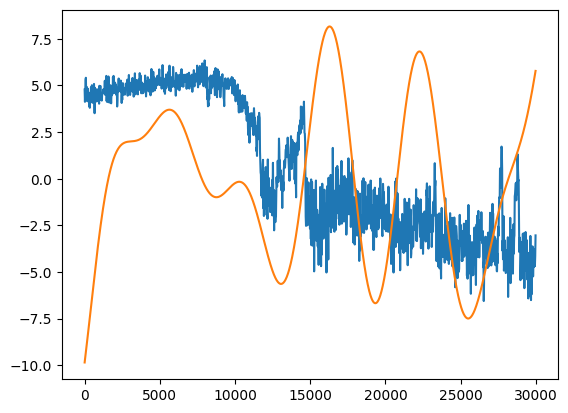

In [16]:
print(df_harmonics)
plt.plot(t, y)
plt.plot(t, sum(list_models));

# upper period = n_years

In [ ]:
y_vals = y.copy()
list_models = []
harmonics = {
    "P": [],
    "A": [],
    "phi": []
}
for i in range(10):
    print(f"***** Iteration number {i+1} *******")
    A, P, phi = find_harmonic(t, y_vals, upper_period=n_years)
    y_model = build_model(t, A, P, phi)
    y_vals -= y_model
    
    list_models.append(y_model)
    
    harmonics["P"].append(P)
    harmonics["A"].append(A)
    harmonics["phi"].append(phi)

df_harmonics = pd.DataFrame(harmonics)

***** Iteration number 1 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 8 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 2 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 3 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 4 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 5 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 6 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_571 draw iterations (4_000 + 6_284 draws total) took 10 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 7 *******


Initializing NUTS using jitter+adapt_diag...


,P,A,phi
0,12586.294662,1.029542,4.717250
1,29986.663894,4.377998,4.754361
2,17010.650475,2.062756,4.654975
3,9656.725176,0.944783,3.144895
4,10414.311674,1.818521,3.257287
5,23097.975896,0.663316,1.977183
6,8582.512999,2.321964,2.543607
7,9649.331061,4.358993,0.004506
8,11991.352858,2.072976,0.271377
9,17709.195352,0.777830,4.868853


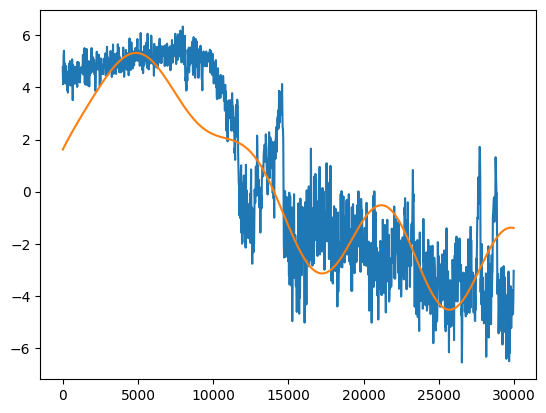

In [38]:
df_harmonics
plt.plot(t, y)
plt.plot(t, sum(list_models));

# upper period = 3/2 n_years

In [39]:
y_vals = y.copy()
list_models = []
harmonics = {
    "P": [],
    "A": [],
    "phi": []
}
for i in range(10):
    print(f"***** Iteration number {i+1} *******")
    A, P, phi = find_harmonic(t, y_vals, upper_period=3*n_years/2)
    y_model = build_model(t, A, P, phi)
    y_vals -= y_model
    
    list_models.append(y_model)
    
    harmonics["P"].append(P)
    harmonics["A"].append(A)
    harmonics["phi"].append(phi)

df_harmonics = pd.DataFrame(harmonics)

***** Iteration number 1 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 2 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 3 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 4 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 5 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
There were 587 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 6 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 7 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 8 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 14 seconds.
There were 867 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 9 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 10 seconds.
There were 487 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 10 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


              P         A       phi
0  44584.711551  4.423691  5.676517
1  19199.520178  1.100252  4.438520
2  44107.178123  0.290862  4.151613
3   9608.496958  0.506036  0.211517
4   7646.243092  0.253363  2.412652
5  21239.056129  0.150218  5.280058
6   7276.200417  0.486291  5.305622
7   9709.425758  0.298676  4.735015
8   9453.981339  0.385530  1.356854
9   4079.499042  0.445223  0.106262


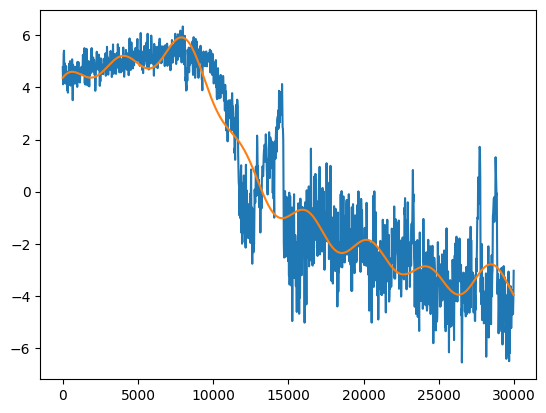

In [41]:
print(df_harmonics)
plt.plot(t, y)
plt.plot(t, sum(list_models));

# upper period = 2*n_years

In [33]:
y_vals = y.copy()
list_models = []
harmonics = {
    "P": [],
    "A": [],
    "phi": []
}
for i in range(10):
    print(f"***** Iteration number {i+1} *******")
    A, P, phi = find_harmonic(t, y_vals, upper_period=2*n_years)
    y_model = build_model(t, A, P, phi)
    y_vals -= y_model
    
    list_models.append(y_model)
    
    harmonics["P"].append(P)
    harmonics["A"].append(A)
    harmonics["phi"].append(phi)

df_harmonics = pd.DataFrame(harmonics)

***** Iteration number 1 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 2 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 3 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 4 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 5 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 6 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 7 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 8 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


***** Iteration number 9 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 6 seconds.
There were 1686 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


***** Iteration number 10 *******


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [34]:
df_harmonics

,P,A,phi
0,47738.268495,4.481363,5.790890
1,43510.259771,0.479301,2.310317
2,32289.584465,0.671930,0.009321
3,37813.379523,0.786198,4.383053
4,22777.863745,0.778734,2.112314
5,23897.411566,1.503710,2.333025
6,21702.505839,3.120295,5.032332
7,9882.529805,0.518967,0.491824
8,15906.413688,0.108417,3.818815
9,7571.584431,0.198688,0.116546


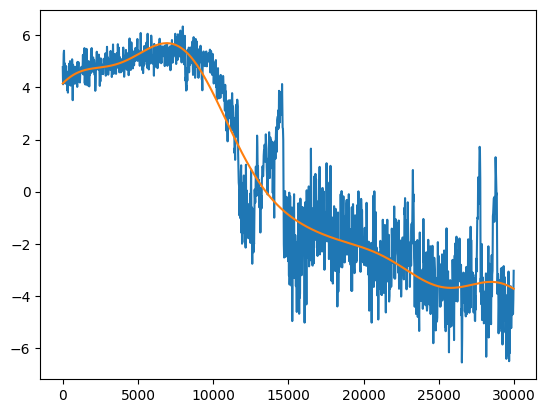

In [35]:
plt.plot(t, y)
plt.plot(t, sum(list_models));

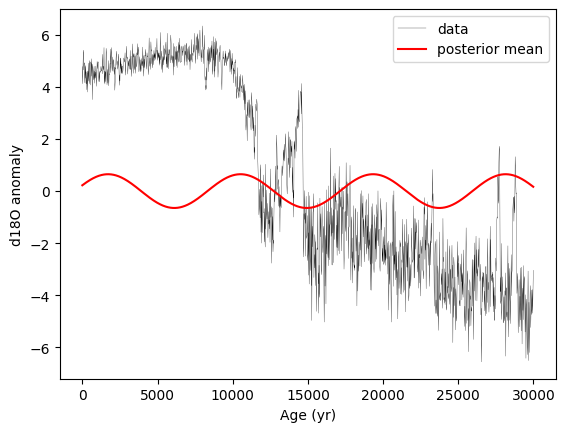

           mean        sd    hdi_3%    hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
A         0.648     0.154     0.361      0.937      0.047    0.003      11.0   
P      8812.326  1278.081  7330.033  10434.410    893.115    4.371       3.0   
phi       5.064     0.336     4.417      5.682      0.106    0.008      10.0   
sigma     3.723     0.067     3.602      3.854      0.001    0.001    3520.0   

       ess_tail  r_hat  
A         250.0   1.13  
P          58.0   1.83  
phi       163.0   1.13  
sigma    2560.0   1.00  


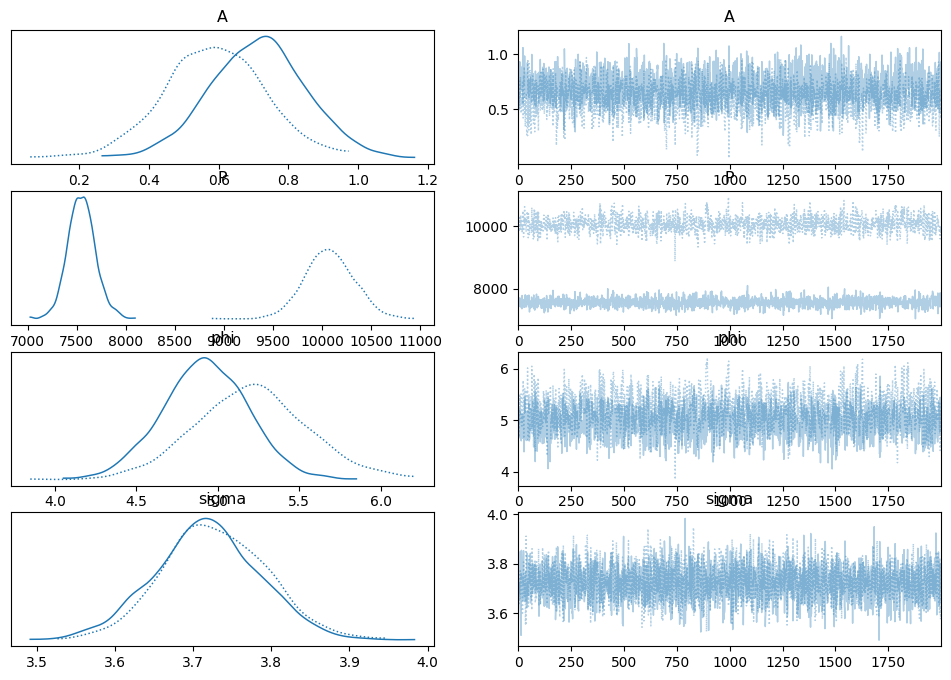

In [68]:
A_hat   = trace.posterior["A"].mean().item()
P_hat   = trace.posterior["P"].mean().item()
phi_hat = trace.posterior["phi"].mean().item()

model_curve = A_hat * np.cos(2*np.pi * t / P_hat + phi_hat)

plt.figure()
plt.plot(t, y,  lw=0.2, c="k", label="data")
plt.plot(t, model_curve, "r", lw=1.5, label="posterior mean")
plt.legend(); plt.xlabel("Age (yr)"); plt.ylabel("d18O anomaly")
plt.show()

print(az.summary(trace, var_names=["A", "P", "phi", "sigma"]))
az.plot_trace(trace, var_names=["A", "P", "phi", "sigma"]);

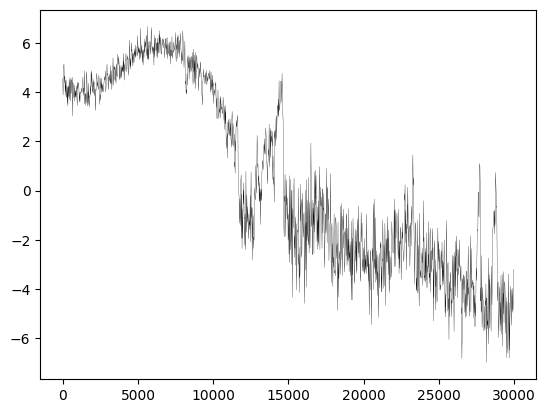

In [70]:
plt.figure()
plt.plot(t, y-model_curve,  lw=0.2, c="k")
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [A, P, phi, sigma]


Output()

Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 15 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


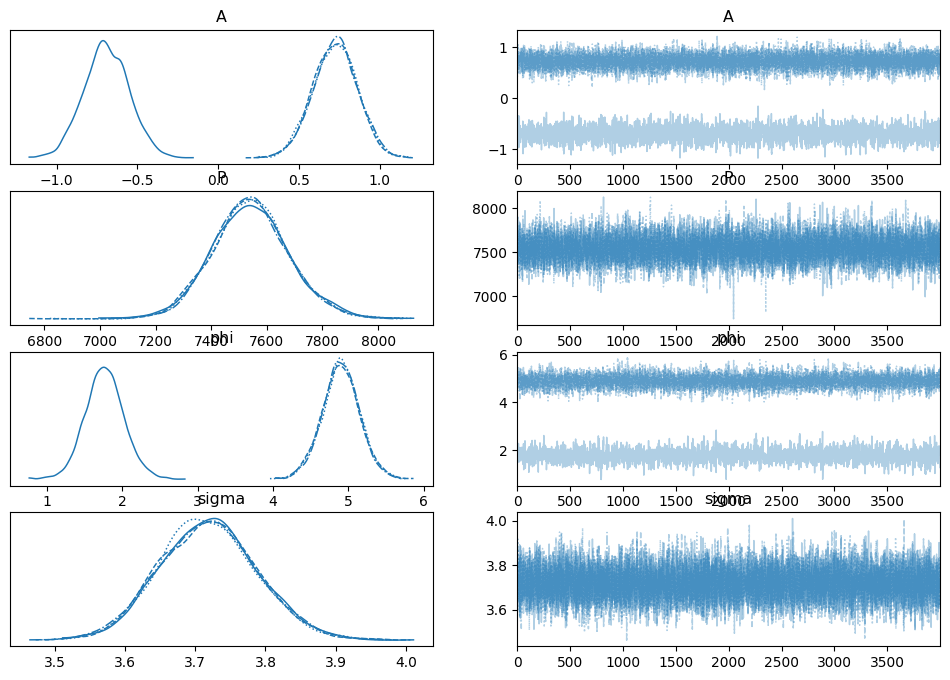

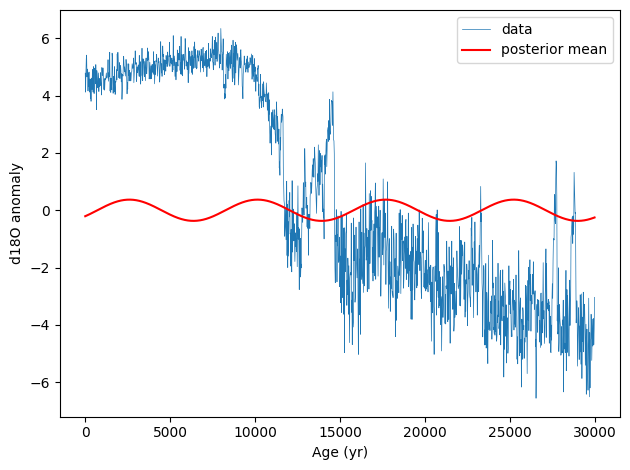

In [7]:
# ------------------------------------------------------------
# 0) Imports
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Load & pre-process data  (keep it simple!)
# ------------------------------------------------------------
RAW_FILE   = "./data/d18O NGRIP 21.04.24.xlsx"
SHEET_NAME = "Raw Data"
MAX_AGE_Y  = 30_000                       # truncate at 30 kyr

# read
df = (
    pd.read_excel(RAW_FILE, sheet_name=SHEET_NAME, header=None,
                  engine="openpyxl")
      .iloc[10:6124, 2:4]                 # rows & columns that matter
      .rename(columns={2: "Age", 3: "d18O"})
)

# zero-the-time axis, centre the signal
df["Age"]  = df["Age"] - df["Age"].min()
df["d18O"] = df["d18O"] - df["d18O"].mean()
df         = df[df["Age"] <= MAX_AGE_Y]   # clip to requested window

t = df["Age"].values.astype(float)        # time (years)
y = df["d18O"].values.astype(float)       # observations
y_std = y.std()                           # handy later

# (optional) rescale time to 0–1 to help the sampler
t_scaled = (t - t.min()) / (t.max() - t.min())

# ------------------------------------------------------------
# 2) Single-harmonic PyMC model
# ------------------------------------------------------------
# 👉 Replace these two numbers with the dominant period & amplitude
#    you saw in your Fourier table if you already trust them.
PERIOD_GUESS   = 6500                     # years
AMP_GUESS      = 50                       # ‰ (or whatever units)

with pm.Model() as harmonic_model:

    # ---- priors ----
    A     = pm.Normal("A",   mu=AMP_GUESS,   sigma=2*y_std)              # amplitude
    P     = pm.Normal("P",   mu=PERIOD_GUESS, sigma=PERIOD_GUESS/3)      # period (years)
    phi   = pm.Uniform("phi", lower=0, upper=2*np.pi)                    # phase (radians)
    sigma = pm.HalfNormal("sigma", sigma=y_std)                          # noise SD

    # ---- deterministic mean ----
    mu = A * pm.math.cos(2*np.pi * t / P + phi)

    # ---- likelihood ----
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # ---- inference ----
    trace = pm.sample(draws=4000,
                      tune=2000,
                      chains=4,
                      target_accept=0.95,
                      return_inferencedata=True,
                      progressbar=True)

# ------------------------------------------------------------
# 3) Quick checks
# ------------------------------------------------------------
az.summary(trace, var_names=["A", "P", "phi", "sigma"])

az.plot_trace(trace, var_names=["A", "P", "phi", "sigma"])
plt.show()

# posterior mean curve
A_hat   = trace.posterior["A"].mean().item()
P_hat   = trace.posterior["P"].mean().item()
phi_hat = trace.posterior["phi"].mean().item()

model_curve = A_hat * np.cos(2*np.pi * t / P_hat + phi_hat)

plt.figure()
plt.plot(t, y,  lw=0.5, label="data")
plt.plot(t, model_curve, "r", lw=1.5, label="posterior mean")
plt.legend(); plt.xlabel("Age (yr)"); plt.ylabel("d18O anomaly")
plt.tight_layout()
plt.show()

In [8]:
params = {}
for param_name in ["A", "P", "phi"]:
    list_values = trace.posterior[param_name].values.flatten()
    params[param_name] = np.mean(list_values)
    params["d"+param_name] = np.std(list_values)
model = params["A"] * np.cos(2 * np.pi / params["P"] * t + params["phi"])
params

{'A': 0.37067705861681555,
 'dA': 0.6280670652684093,
 'P': 7542.191691945891,
 'dP': 138.88235708155955,
 'phi': 4.116967758571551,
 'dphi': 1.3827848026407805}

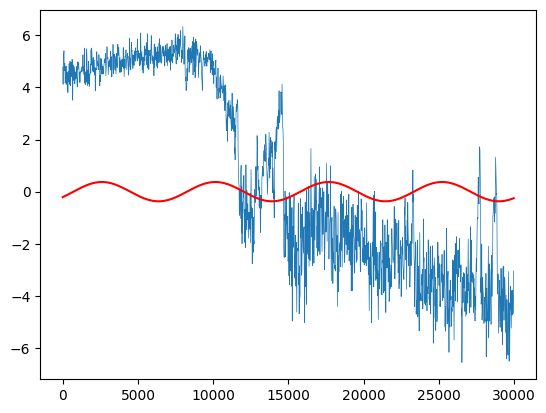

In [9]:
plt.plot(t, y, linewidth=0.5)
plt.plot(t, model, c="r");

Using 1500 data points, spanning 29985 years.
Sampling for the first harmonic...


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A1, P1, phi1, sigma_noise]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Fitted First Harmonic Parameters (Posterior Means):
  Amplitude (A1): 1.095
  Period (P1):    11161.1 years
  Phase (phi1):   4.518 radians
  Noise (sigma):  3.615


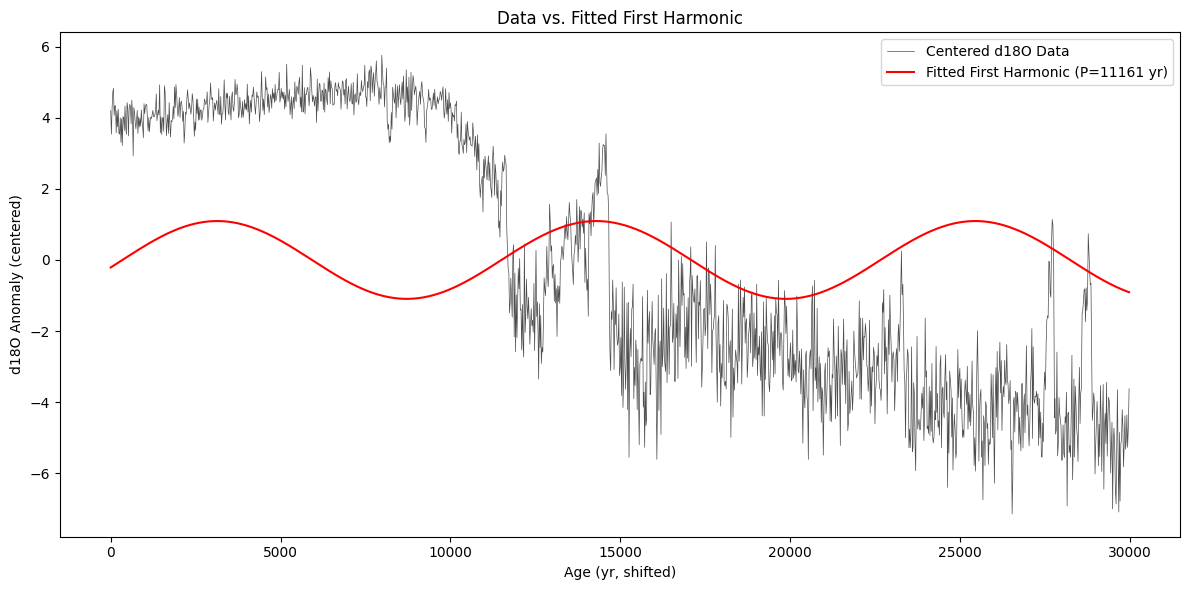


--- Script Finished ---


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az # For summary, optional for just plotting

# --- Configuration ---
N_YEARS_DATA = 30000
MIN_PERIOD_DISCOVERY = 200 # Minimum period for the first harmonic
MAX_PERIOD_DISCOVERY = N_YEARS_DATA / 2 # Max period for the first harmonic
N_SAMPLES = 2000
N_TUNE = 1000
N_CHAINS = 2
TARGET_ACCEPT = 0.9

# --- 1. Load and Prepare Data ---
df = pd.read_excel("./data/d18O NGRIP 21.04.24.xlsx",
                   sheet_name="Raw Data", header=None,
                   engine="openpyxl")
df_data = df.iloc[10:6124, 2:4]
df_data.columns = ["Age_raw", "d18o"]
df_data = df_data.dropna().astype(float)

min_age_in_loaded_data = df_data["Age_raw"].min()
df_data["Age"] = df_data["Age_raw"] - min_age_in_loaded_data
df_data = df_data[df_data["Age"] <= N_YEARS_DATA]

# Center d18o (important for fitting)
mean_d18o = df_data["d18o"].mean()
df_data["d18o_centered"] = df_data["d18o"] - mean_d18o

t_data = df_data["Age"].values.astype("float")
y_data = df_data["d18o_centered"].values.astype("float") # Use centered data for fitting

print(f"Using {len(t_data)} data points, spanning {t_data.max():.0f} years.")
y_std = y_data.std()

# --- 2. Model for the First Harmonic ---
with pm.Model() as first_harmonic_model:
    # Priors for the first harmonic
    # Amplitude: Must be positive. Sigma based on data's std dev.
    A1 = pm.HalfNormal('A1', sigma=max(y_std, 0.01))
    # Period: Uniform for discovery within a reasonable range
    P1 = pm.Uniform('P1', lower=MIN_PERIOD_DISCOVERY, upper=MAX_PERIOD_DISCOVERY)
    # Phase: Uniform over one full cycle
    phi1 = pm.Uniform("phi1", lower=0, upper=2 * np.pi)
    # Noise term for the model
    sigma_noise = pm.HalfNormal("sigma_noise", sigma=max(y_std, 0.01))

    # Likelihood: observed data is a cosine wave plus noise
    mu1  = A1 * pm.math.cos(2 * np.pi * t_data / P1 + phi1)
    y_obs = pm.Normal('y_obs', mu=mu1, sigma=sigma_noise, observed=y_data)

    # --- 3. Sample from the Posterior ---
    print("Sampling for the first harmonic...")
    trace_first_harmonic = pm.sample(N_SAMPLES, tune=N_TUNE, chains=N_CHAINS,
                                     target_accept=TARGET_ACCEPT,
                                     progressbar=True, random_seed=123)

# --- 4. Extract Posterior Means and Plot ---
# Get the mean of the posterior distributions for each parameter
A1_hat   = trace_first_harmonic.posterior["A1"].mean().item()
P1_hat   = trace_first_harmonic.posterior["P1"].mean().item()
phi1_hat = trace_first_harmonic.posterior["phi1"].mean().item()
sigma_noise_hat = trace_first_harmonic.posterior["sigma_noise"].mean().item()

print(f"\nFitted First Harmonic Parameters (Posterior Means):")
print(f"  Amplitude (A1): {A1_hat:.3f}")
print(f"  Period (P1):    {P1_hat:.1f} years")
print(f"  Phase (phi1):   {phi1_hat:.3f} radians")
print(f"  Noise (sigma):  {sigma_noise_hat:.3f}")

# Calculate the model curve using the posterior mean parameters
first_harmonic_curve = A1_hat * np.cos(2 * np.pi * t_data / P1_hat + phi1_hat)

# Plot the data and the fitted first harmonic
plt.figure(figsize=(12, 6))
plt.plot(t_data, y_data, lw=0.5, c="k", label="Centered d18O Data", alpha=0.7)
plt.plot(t_data, first_harmonic_curve, "r-", lw=1.5, label=f"Fitted First Harmonic (P={P1_hat:.0f} yr)")
plt.xlabel("Age (yr, shifted)")
plt.ylabel("d18O Anomaly (centered)")
plt.title("Data vs. Fitted First Harmonic")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Display a summary of the posterior distributions
# print("\nArviZ Summary for the First Harmonic:")
# print(az.summary(trace_first_harmonic, var_names=["A1", "P1", "phi1", "sigma_noise"], round_to=3))

print("\n--- Script Finished ---")